In [66]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import symbols, diff, cos, exp, factor, simplify
import sympy as sp

## Exercise 1

$\min_u \cos(u-2) \cdot \exp(-(\frac{u}{10})^2)$

-u*exp(-u**2/100)*cos(u - 2)/50 - exp(-u**2/100)*sin(u - 2)
-(u*cos(u - 2) + 50*sin(u - 2))*exp(-u**2/100)/50
(-u*cos(u - 2)/50 - sin(u - 2))*exp(-u**2/100)
Minimum u: -1.1191626805473975
Minimum value: -0.9873044530968471


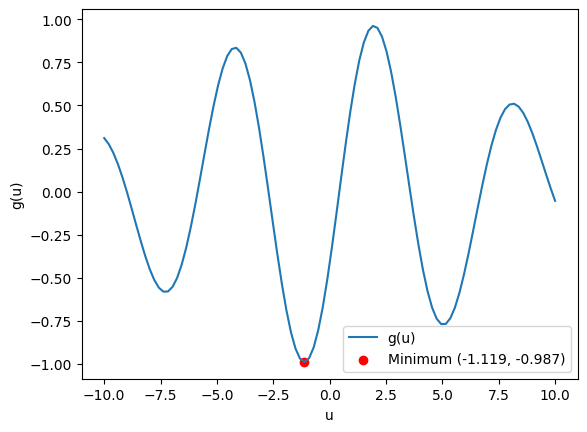

In [67]:
def g(u):
    return np.cos(u-2) * np.exp(-(u/10)**2)

u = symbols('u')
L = cos(u - 2) * exp(-(u/10)**2)
dL = diff(L, u)
print(dL)
print(factor(dL))
print(simplify(dL))

def grad(u):
    # gra = -u*np.exp(-u**2/100)*np.cos(u - 2)/50 - np.exp(-u**2/100)*np.sin(u - 2) # from diff(L, u)
    # gra = -(u*np.cos(u - 2) + 50*np.sin(u - 2))*np.exp(-u**2/100)/50 # from factor(dL)
    gra = (-u*np.cos(u - 2)/50 - np.sin(u - 2))*np.exp(-u**2/100)
    return  gra

def minimize(x0, eta, n_iter):
    x = x0
    for i in range(n_iter):
        x -= eta * grad(x)
    return x

if __name__ == "__main__":
    # Define initial values
    x0 = 0.0  # Initial guess
    eta = 0.01  # Step size (learning rate)
    n_iter = 1000  # Number of iterations

    # Perform gradient descent
    min_u = minimize(x0, eta, n_iter)

    # Calculate the minimum value of the function
    min_value = g(min_u)

    # Print the results
    print(f"Minimum u: {min_u}")
    print(f"Minimum value: {min_value}")

    # Plot the function and the minimum point
    u = np.linspace(-10, 10, 100)
    plt.plot(u, g(u), label='g(u)')
    plt.scatter(min_u, min_value, color='red', label=f'Minimum ({min_u:.3f}, {min_value:.3f})')
    plt.xlabel('u')
    plt.ylabel('g(u)')
    plt.legend()
    plt.show()


## Exercise 2

$\min_{u_1, u_2} (2.8 - u_1)^2 + (6.1 - 2u_2)^2$

In [68]:
def g(u):
    loss_value = (2.8-u[0])**2 + (6.1-2*u[1])**2
    return loss_value

u1, u2 = symbols('u[0] u[1]')
L = (2.8 - u1)**2 + (6.1 - 2*u2)**2
dL1 = diff(L, u1)
dL2 = diff(L, u2)

print(dL1)
print(dL2)

def grad(u):
    c = np.array([[2, 8]]).T
    b = np.array([[5.6, 24.4]]).T
    return np.multiply(c, u) - b 

def minimizer(uvec, lr, N):
    u = uvec.copy().astype(np.float64)  
    for _ in range(N):
        gradient = grad(u)
        u -= lr * gradient
    return u

if __name__ == "__main__":
    u0 = np.array([[0.0], [0.0]])  
    uz = minimizer(u0, lr=0.1, N=500)   
    print('type=', type(uz))
    print('shape=', uz.shape)
    print(': u*=', uz)
    print(': loss(u*)=', g(uz))
    print(': grad(u*)=', grad(uz))

2.0*u[0] - 5.6
8.0*u[1] - 24.4
type= <class 'numpy.ndarray'>
shape= (2, 1)
: u*= [[2.8 ]
 [3.05]]
: loss(u*)= [7.88860905e-31]
: grad(u*)= [[-1.77635684e-15]
 [ 0.00000000e+00]]


## Exercise 3

$\min_u -\exp(-(u-29)^2)$

Minimum u: 0.0
Minimum value: -0.0


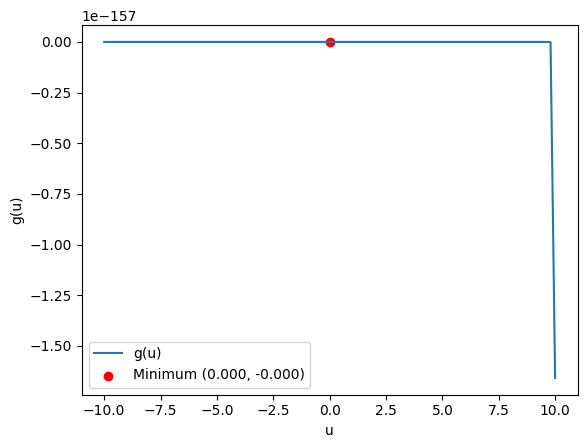

In [69]:
def g(x):
    return -np.exp(-(x-29)**2)

def grad(x):
    return 2*(x-29)*np.exp(-(x-29)**2)

def minimize(x0, eta, n_iter):
    x = x0
    for i in range(n_iter):
        x -= eta * grad(x)
    return x

if __name__ == "__main__":
    # Define initial values
    x0 = 0.0  # Initial guess
    eta = 0.01  # Step size (learning rate)
    n_iter = 1000  # Number of iterations

    # Perform gradient descent
    min_u = minimize(x0, eta, n_iter)

    # Calculate the minimum value of the function
    min_value = g(min_u)

    # Print the results
    print(f"Minimum u: {min_u}")
    print(f"Minimum value: {min_value}")

    # Plot the function and the minimum point
    v = np.linspace(-10, 10, 100)
    plt.plot(v, g(v), label='g(u)')
    plt.scatter(min_u, min_value, color='red', label=f'Minimum ({min_u:.3f}, {min_value:.3f})')
    plt.xlabel('u')
    plt.ylabel('g(u)')
    plt.legend()
    plt.show()

## Exercise 4

$\min_\mathbf{u} g(\mathbf{u})$

where

$g(\mathbf{u}) = -\exp(-53 -u_1^2 - 2 u_2^2 -u_1 u_2 + 10 u_1 + 19 u_2)$

or

$g(\mathbf{u}) = -\exp(-(\mathbf{u} - \begin{bmatrix} 3\\ 4\end{bmatrix})^T \cdot \begin{bmatrix} 1 & 0.5\\ 0.5 & 2\end{bmatrix} \cdot (\mathbf{u} - \begin{bmatrix} 3\\ 4\end{bmatrix}))$

and $\mathbf{u} = [u_1, u_2]^T$

Minimum u1: -141.83420836650282
Minimum u2: -330.0222662388793
Minimum value: [[9.60643960e+065 2.20270466e+066]
 [5.14751417e+147 1.18029717e+148]]


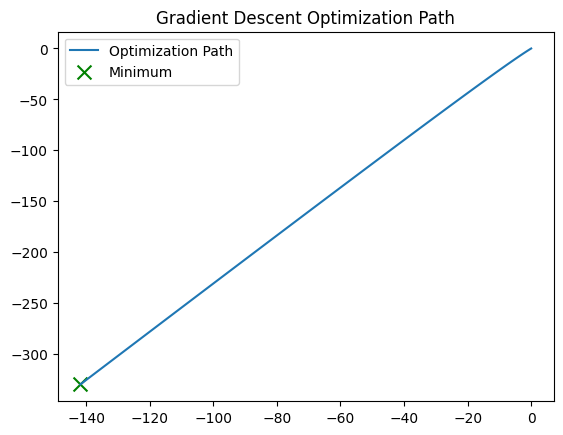

In [70]:
# Define the objective function g(u)
def objective_function(u):
    u1, u2 = u[0], u[1]
    gu1 = -np.exp(-53 - u1**2 - 2*u2**2 - u1*u2 + 10*u1 + 19*u2)
    mu = np.array([[3],[4]])
    Q = np.array([[1, 0.5], [0.5, 2]])
    gu2 = np.dot(np.dot(-np.exp(-(u-mu).T),Q) , (u-mu))
    return gu2

# Define the gradient function
def grad(u):
    u1, u2 = u[0], u[1]
    grad_u1 = -2*u1 - u2 + 10
    grad_u2 = -4*u2 - u1 + 19
    return np.array([grad_u1, grad_u2])

# Define your custom minimize function
def minimize(x0, eta, n_iter):
    x = x0
    trajectory = [x]  # Store the optimization path
    for i in range(n_iter):
        x -= eta * grad(x)
        trajectory.append(x.copy())
    return x, np.array(trajectory)

if __name__ == "__main__":
    # Initial guess for u1 and u2
    initial_guess = [0.0, 0.0]

    # Learning rate (step size)
    eta = 0.01

    # Number of iterations
    n_iter = 100

    # Use your custom minimize function to find the minimum and the trajectory
    minimum_u, optimization_path = minimize(initial_guess, eta, n_iter)

    # Create a grid of points for plotting
    u1 = np.linspace(-5, 5, 100)
    u2 = np.linspace(-5, 5, 100)
    U1, U2 = np.meshgrid(u1, u2)

    # Plot the optimization path
    path = np.array(optimization_path)
    plt.plot(path[:, 0], path[:, 1],label='Optimization Path')

    # Highlight the minimum point
    plt.scatter(minimum_u[0], minimum_u[1], color='green', marker='x', s=100, label='Minimum')

    print(f"Minimum u1: {minimum_u[0]}")
    print(f"Minimum u2: {minimum_u[1]}")
    print(f"Minimum value: {objective_function(minimum_u)}")

    plt.legend()
    plt.title('Gradient Descent Optimization Path')
    plt.show()


## Exercise 5

$g(\mathbf{u} = [u_1, u_2, u_3, u_4]) = u_1^2 + 2 u_2^2 + u_3^2 + u_4^2 - 10 u_1 + 20 u_2 - 30 u_3 + 40 u_4$

Minimum u1: 4.336902220526234
Minimum u2: -4.915648403205752
Minimum u3: 13.010706661578704
Minimum u4: -17.347608882104936
Minimum value: -688.5536043225175


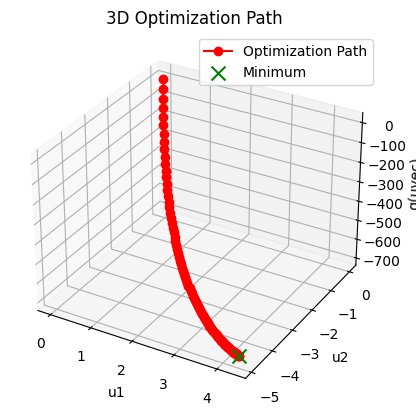

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the objective function g(uvec)
def g(uvec):
    return uvec[0]**2 + 2*uvec[1]**2 + uvec[2]**2 + uvec[3]**2 - 10*uvec[0] + 20*uvec[1] - 30*uvec[2] + 40*uvec[3]

# Define the gradient function grad(uvec)
def grad(uvec):
    dg = np.array([2*uvec[0] - 10,
                   4*uvec[1] + 20,
                   2*uvec[2] - 30,
                   2*uvec[3] + 40])
    return dg

# Define your custom minimize function
def minimize(x0, eta, n_iter):
    x = x0
    trajectory = [x]  # Store the optimization path
    for i in range(n_iter):
        x -= eta * grad(x)
        trajectory.append(x.copy())
    return x, np.array(trajectory)

if __name__ == "__main__":
    # Initial guess for u1, u2, u3, and u4
    initial_guess = [0.0, 0.0, 0.0, 0.0]

    # Learning rate (step size)
    eta = 0.01

    # Number of iterations
    n_iter = 100

    # Use your custom minimize function to find the minimum and the trajectory
    minimum_u, optimization_path = minimize(initial_guess, eta, n_iter)

    # Print the results
    print(f"Minimum u1: {minimum_u[0]}")
    print(f"Minimum u2: {minimum_u[1]}")
    print(f"Minimum u3: {minimum_u[2]}")
    print(f"Minimum u4: {minimum_u[3]}")
    print(f"Minimum value: {g(minimum_u)}")

    # Plot 3D graph of the optimization path
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Extract the x, y, and z coordinates from the optimization path
    x_coords = optimization_path[:, 0]
    y_coords = optimization_path[:, 1]
    z_coords = g(optimization_path.T)

    ax.plot(x_coords, y_coords, z_coords, marker='o', color='red', label='Optimization Path')
    
    # Add the minimum point
    min_x = minimum_u[0]
    min_y = minimum_u[1]
    min_z = g(minimum_u)
    ax.scatter(min_x, min_y, min_z, color='green', marker='x', s=100, label='Minimum')
    
    ax.set_xlabel('u1')
    ax.set_ylabel('u2')
    ax.set_zlabel('g(uvec)')
    ax.set_title('3D Optimization Path')
    plt.legend()
    
    plt.show()


## Exercise 4

$\min_\mathbf{u} g(\mathbf{u})$ 
when $g(\mathbf{u}) = -e^{-({u}-5)^2}$


In [72]:
def g(u):
    return - np.exp(-(u*5)**2)

def grad(u):
    return -np.exp(-(x-5)**2) * (-2*u + 10)

step_size = 0.5
x = 6.5
for i in range(8):
    x -= step_size * grad(x)
print(f'x = {x} ; grad = {grad(x)}')

x = 5.0 ; grad = -0.0


In [73]:
from sympy import symbols, diff, cos, exp, factor, simplify, log
v = symbols('x')
L = (v-1.5)**2 - 3* log(v+2)
dL = diff(L, v)
print(dL)
# print(factor(dL))
# print(simplify(dL))

def grad(u):
    return 2.0*u - 3.0 - 3/(u + 2)

2.0*x - 3.0 - 3/(x + 2)


In [74]:
import sympy as sp
v = sp.symbols('v')
L = 5*v - 3*(1-sp.log(3.8-v)) - 1
dL = sp.diff(L, v)
print(dL)


5 - 3/(3.8 - v)


In [75]:
import sympy as sp
import numpy as np

# Define the symbols for u1 and u2
u1, u2 = sp.symbols('u1 u2')

# Define A and b as NumPy arrays
A = np.array([[2, 1], [1.5, 3]])
b = np.array([[-7], [9]])

# Convert A and b to SymPy matrices
A_sym = sp.Matrix(A)
b_sym = sp.Matrix(b)

# Define the vector u as a column vector with u1 and u2
v = sp.Matrix([u1, u2])

# Define the expression L
L = v.T @ A_sym @ v + b_sym.T @ v

# Calculate the gradient of L with respect to u1 and u2
gradient_u1 = sp.diff(L, u1)
gradient_u2 = sp.diff(L, u2)

# Display the gradients
print("Gradient with respect to u1:", gradient_u1)
print("Gradient with respect to u2:", gradient_u2)


Gradient with respect to u1: Matrix([[4.0*u1 + 2.5*u2 - 7]])
Gradient with respect to u2: Matrix([[2.5*u1 + 6.0*u2 + 9]])
